In [1]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib widget

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
import csv

os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz\\bin\\'

directory = os.getcwd()

Data: 1
Accuracy: 0.684348239771646
Precision: 0.6802652733118971
Recall: 0.5861471861471862
F1-Score: 0.6297088642916938
Data: 2
Accuracy: 0.6880748493498255
Precision: 0.6771765663140765
Recall: 0.5865045806906272
F1-Score: 0.6285876132930514
Data: 3
Accuracy: 0.6905328258801142
Precision: 0.6764182644791461
Recall: 0.6016174402250352
F1-Score: 0.6368288824788313
Data: 4
Accuracy: 0.6845861084681256
Precision: 0.6740275526742301
Recall: 0.5840941011235955
F1-Score: 0.625846501128668
Data: 5
Accuracy: 0.6914050111005392
Precision: 0.6816170555108608
Recall: 0.5947700947700948
F1-Score: 0.6352389878163074

Average:

Accuracy: 0.6877894069140501
Precision: 0.6779009424580422
Recall: 0.5906266805913079
F1-Score: 0.6312421698017104


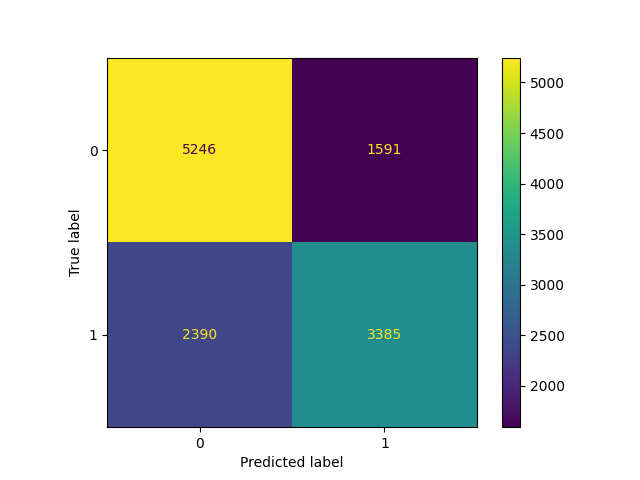

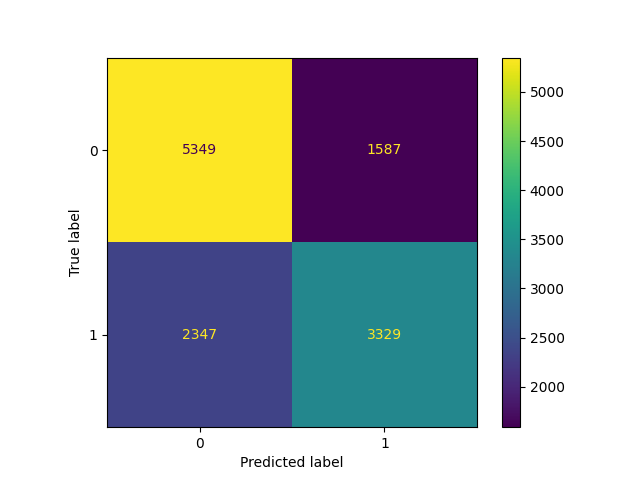

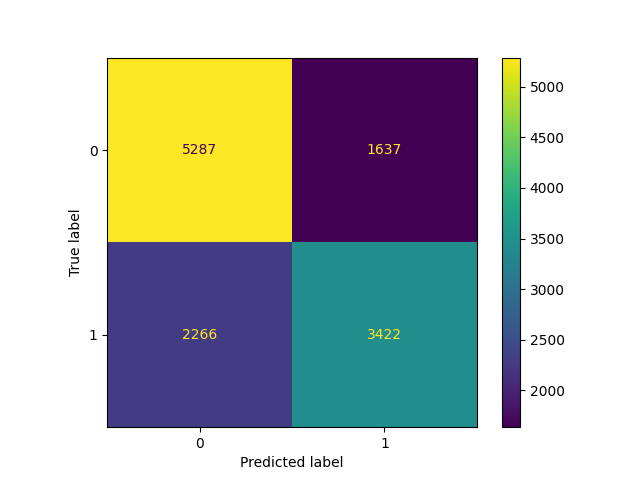

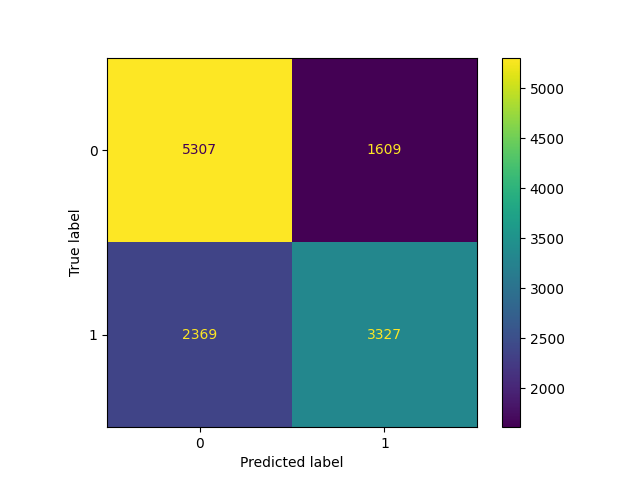

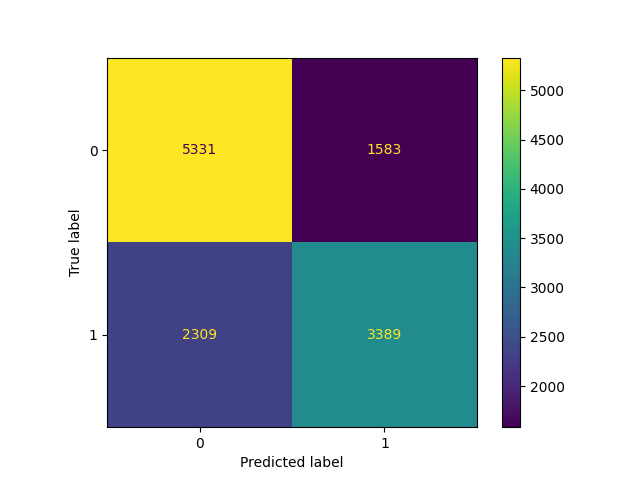

In [2]:
accuracy = [0.0 for x in range(1,(5+1))]
precision = [0.0 for x in range(1,(5+1))]
recall = [0.0 for x in range(1,(5+1))]
f1score = [0.0 for x in range(1,(5+1))]

for i in range(1,(5+1)):
    print('Data: ' + str(i))
    with open(directory+'\\..\\Data Cleaning\\train-'+str(i)+'.csv', 'r') as csvfile:
        dataset = list(csv.reader(csvfile))

    datasetLength = len(dataset)
    dataLabels = dataset[0]
    dataset = dataset[1:datasetLength]
    npDataset = np.array(dataset, dtype='float64')

    X_train = npDataset[:,0:(len(dataLabels)-1)]
    Y_train = npDataset[:,len(dataLabels)-1]

    with open(directory+'\\..\\Data Cleaning\\test-'+str(i)+'.csv', 'r') as csvfile:
        dataset = list(csv.reader(csvfile))

    datasetLength = len(dataset)
    dataLabels = dataset[0]
    dataset = dataset[1:datasetLength]
    npDataset = np.array(dataset, dtype='float64')

    X_test = npDataset[:,0:(len(dataLabels)-1)]
    Y_test = npDataset[:,len(dataLabels)-1]


    ### model
    num_estimators = 101
    depth = None

    randomForest = RandomForestClassifier(n_estimators=num_estimators, max_depth=depth)
    randomForest.fit(X_train, Y_train)

    Y_pred = randomForest.predict(X_test)
    accuracy[i-1] = accuracy_score(Y_test, Y_pred)
    precision[i-1] = precision_score(Y_test, Y_pred, pos_label=float(1))
    recall[i-1] = recall_score(Y_test, Y_pred, pos_label=float(1))
    f1score[i-1] = f1_score(Y_test, Y_pred, pos_label=float(1))
    print("Accuracy:", accuracy[i-1])
    print("Precision:", precision[i-1])
    print("Recall:", recall[i-1])
    print("F1-Score:", f1score[i-1])

    # Create the confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print("\nAverage:\n")
print("Accuracy:", np.mean(accuracy))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1-Score:", np.mean(f1score))


In [3]:
# Export the first three decision trees from the forest

if 0:

    for i in range(num_estimators):
        tree = randomForest.estimators_[i]
        dot_data = export_graphviz(tree,
                                feature_names=dataLabels[0:14],  
                                filled=True,  
                                max_depth=depth, 
                                impurity=False, 
                                proportion=False)
        graph = graphviz.Source(dot_data)
        display(graph)

